<a href="https://colab.research.google.com/github/tejakumartata/data_Science_project/blob/main/Teja_Kumar_Code_File_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Necessary Packages

In [ ]:
import requests
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as split_data
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import (
    accuracy_score as acc_score,
    precision_score as prec_score,
    recall_score as rec_score,
    f1_score as f1_val,
    confusion_matrix ,
    roc_auc_score as auc_score,
    roc_curve as roc_line,
    ConfusionMatrixDisplay,
    classification_report
)
from sklearn.tree import DecisionTreeClassifier as TreeModel
from sklearn.ensemble import RandomForestClassifier as ForestModel
from sklearn.linear_model import LogisticRegression as LogiReg
import seaborn as snsx
import matplotlib.pyplot as pltx
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.utils import resample
import umap.umap_ as umap
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


###  Dataset Loading and Overview

In [ ]:

url = " https://data.montgomerycountymd.gov/api/views/v76h-r7br/rows.json?accessType=DOWNLOAD"
response = requests.get(url)
data = response.json()

columns = data['meta']['view']['columns']
column_names = [col['name'] for col in columns]

df = pd.DataFrame(data['data'], columns=column_names)



In [ ]:

print("First 5 rows with proper structure:")
df.head()

First 5 rows with proper structure:


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,row-mnid.ac5t.8e6c,00000000-0000-0000-2A4D-FC17C663CD70,0,1583413338,None,1583413338,None,{ },2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0,0,2
1,row-wgxs-vi8e-i2eq,00000000-0000-0000-B3DA-6C4E63133CC6,0,1583413338,None,1583413338,None,{ },2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0,1,4
2,row-ij4x-v5qe_k85b,00000000-0000-0000-789E-903C674CCB5E,0,1583413338,None,1583413338,None,{ },2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0,0,1
3,row-89pz.2bj3-i2vs,00000000-0000-0000-51A4-C40AE739AE6F,0,1583413338,None,1583413338,None,{ },2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0,0,1
4,row-v4n8~6buj-pht4,00000000-0000-0000-B1A4-A14175679A12,0,1583413338,None,1583413338,None,{ },2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0,0


In [ ]:
print(f"Dataset shape: {df.shape}")


Dataset shape: (307645, 17)


In [ ]:
print(f"Column names: {column_names}")

Column names: ['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at', 'updated_meta', 'meta', 'YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sid               307645 non-null  object
 1   id                307645 non-null  object
 2   position          307645 non-null  int64 
 3   created_at        307645 non-null  int64 
 4   created_meta      0 non-null       object
 5   updated_at        307645 non-null  int64 
 6   updated_meta      0 non-null       object
 7   meta              307645 non-null  object
 8   YEAR              307645 non-null  object
 9   MONTH             307645 non-null  object
 10  SUPPLIER          307478 non-null  object
 11  ITEM CODE         307645 non-null  object
 12  ITEM DESCRIPTION  307645 non-null  object
 13  ITEM TYPE         307644 non-null  object
 14  RETAIL SALES      307642 non-null  object
 15  RETAIL TRANSFERS  307645 non-null  object
 16  WAREHOUSE SALES   307645 non-null  obj

In [ ]:
df.isnull().sum()

,0
sid,0
id,0
position,0
created_at,0
created_meta,307645
updated_at,0
updated_meta,307645
meta,0
YEAR,0
MONTH,0


### Datapreprocessing

In [ ]:
df.drop(['created_meta','updated_meta'],axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop(columns=['sid', 'id', 'position', 'created_at',   'updated_at',  'meta'])

In [ ]:
df.dtypes

,0
YEAR,object
MONTH,object
SUPPLIER,object
ITEM CODE,object
ITEM DESCRIPTION,object
ITEM TYPE,object
RETAIL SALES,object
RETAIL TRANSFERS,object
WAREHOUSE SALES,object


In [ ]:
numeric_cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].replace('[\$,]', '', regex=True), errors='coerce')


### Exploratory Dataanalysis

/tmp/ipython-input-1392141184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snsx.barplot(x=top_suppliers.index, y=top_suppliers.values, palette='Blues_r')


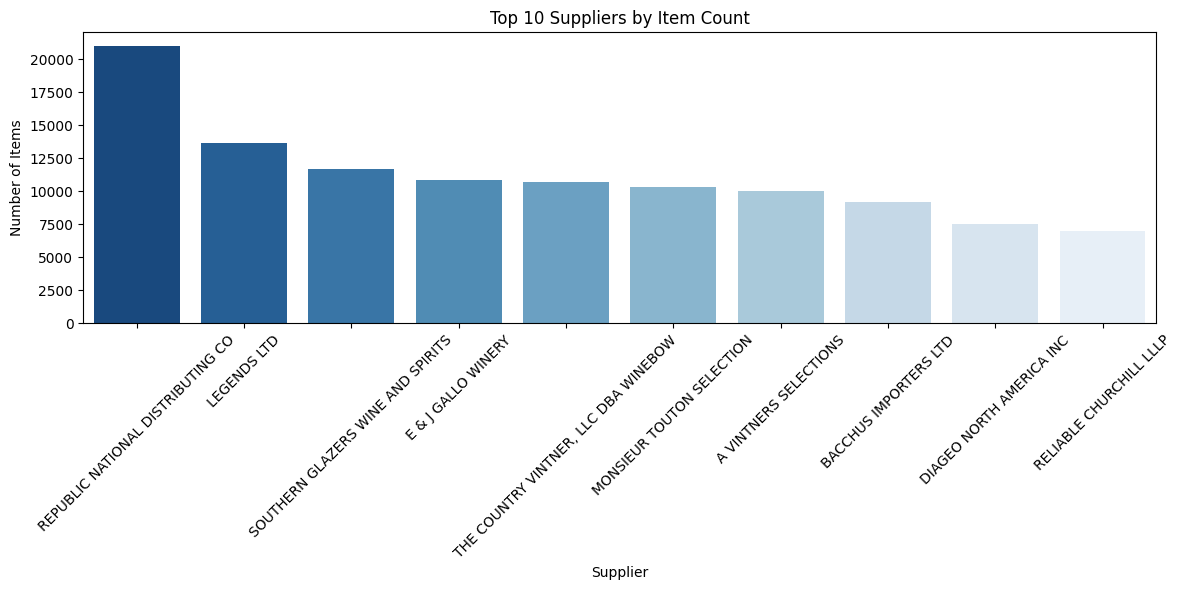

In [ ]:
pltx.figure(figsize=(12, 6))
top_suppliers = df['SUPPLIER'].value_counts().head(10)
snsx.barplot(x=top_suppliers.index, y=top_suppliers.values, palette='Blues_r')
pltx.xticks(rotation=45)
pltx.title("Top 10 Suppliers by Item Count")
pltx.ylabel("Number of Items")
pltx.xlabel("Supplier")
pltx.tight_layout()
pltx.show()


/tmp/ipython-input-3806500181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snsx.countplot(data=df, x='ITEM TYPE', palette='Set3')


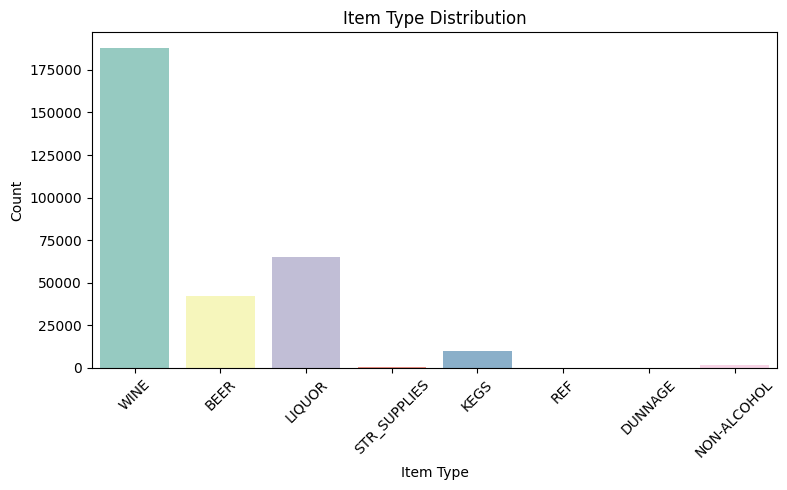

In [ ]:
pltx.figure(figsize=(8, 5))
snsx.countplot(data=df, x='ITEM TYPE', palette='Set3')
pltx.title("Item Type Distribution")
pltx.xlabel("Item Type")
pltx.ylabel("Count")
pltx.xticks(rotation=45)
pltx.tight_layout()
pltx.show()


/tmp/ipython-input-1848033608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snsx.boxplot(data=df, x='ITEM TYPE', y='RETAIL SALES', palette='pastel')


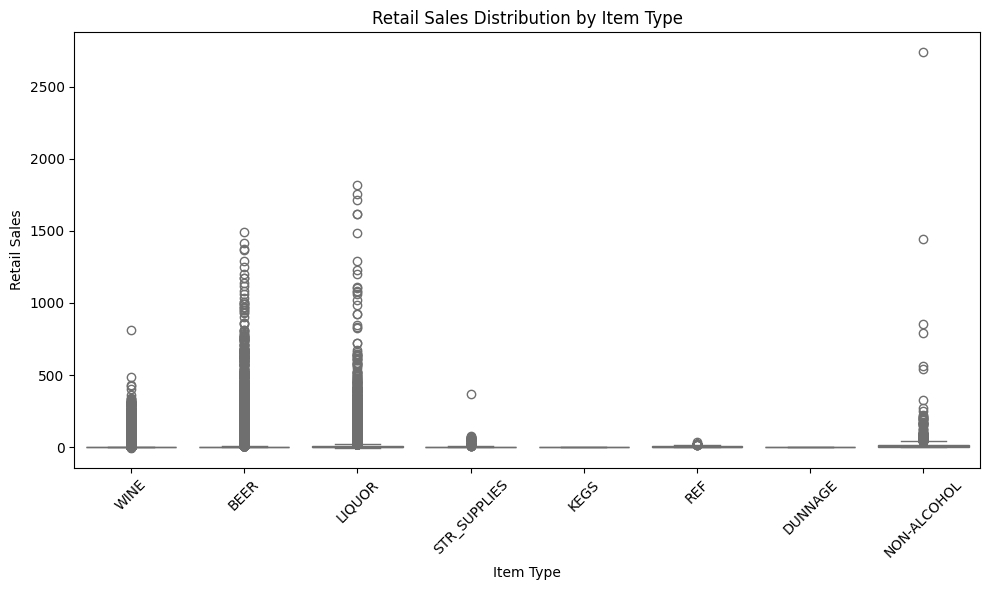

In [ ]:
pltx.figure(figsize=(10, 6))
snsx.boxplot(data=df, x='ITEM TYPE', y='RETAIL SALES', palette='pastel')
pltx.title("Retail Sales Distribution by Item Type")
pltx.xlabel("Item Type")
pltx.ylabel("Retail Sales")
pltx.xticks(rotation=45)
pltx.tight_layout()
pltx.show()


/tmp/ipython-input-3941181395.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col, group_keys=False).apply(iqr_filter)
/tmp/ipython-input-3941181395.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snsx.boxplot(data=df, x='ITEM TYPE', y='RETAIL SALES', palette='pastel')


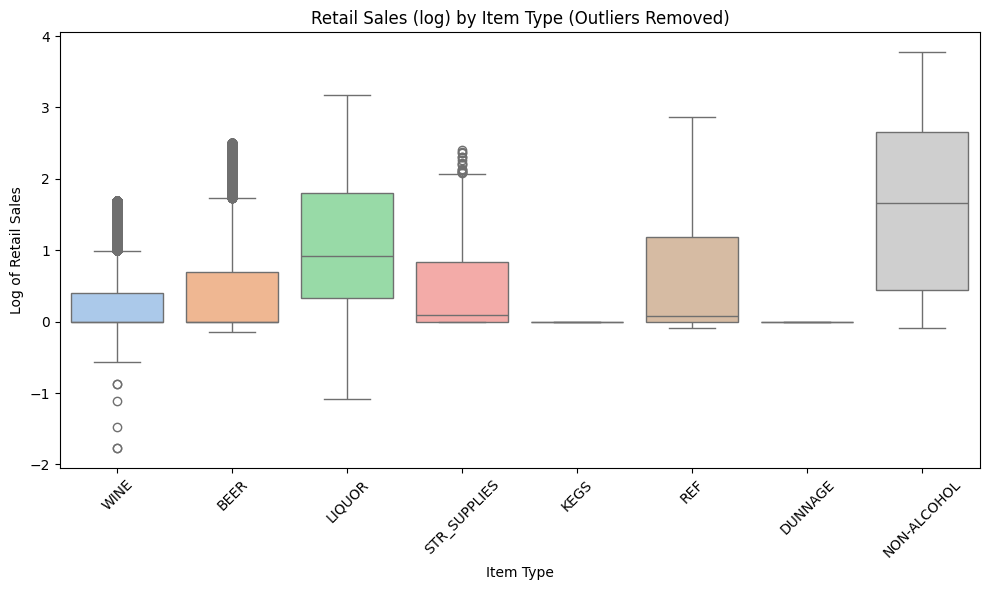

In [ ]:

df['RETAIL SALES'] = pd.to_numeric(df['RETAIL SALES'], errors='coerce')

df = df.dropna(subset=['RETAIL SALES', 'ITEM TYPE'])


def remove_outliers_iqr(df, group_col, target_col):
    def iqr_filter(group):
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        return group[(group[target_col] >= Q1 - 1.5 * IQR) & (group[target_col] <= Q3 + 1.5 * IQR)]

    return df.groupby(group_col, group_keys=False).apply(iqr_filter)

df_clean = remove_outliers_iqr(df, 'ITEM TYPE', 'RETAIL SALES')


df['RETAIL SALES'] = np.log1p(df_clean['RETAIL SALES'])


pltx.figure(figsize=(10, 6))
snsx.boxplot(data=df, x='ITEM TYPE', y='RETAIL SALES', palette='pastel')
pltx.title("Retail Sales (log) by Item Type (Outliers Removed)")
pltx.xlabel("Item Type")
pltx.ylabel("Log of Retail Sales")
pltx.xticks(rotation=45)
pltx.tight_layout()
pltx.show()


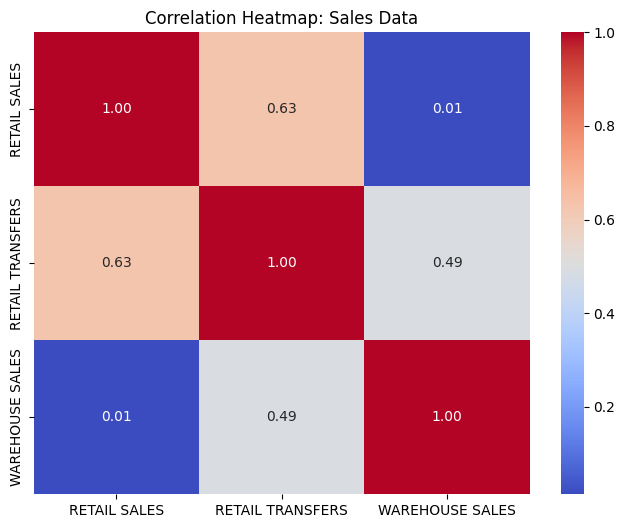

In [ ]:
pltx.figure(figsize=(8, 6))
corr = df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].corr()
snsx.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
pltx.title("Correlation Heatmap: Sales Data")
pltx.show()


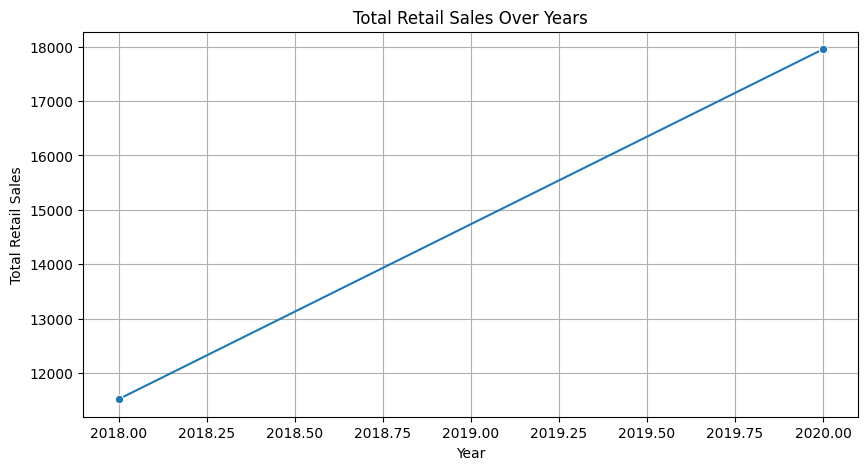

In [ ]:
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')

sales_by_year = df.groupby('YEAR')['RETAIL SALES'].sum().dropna()

pltx.figure(figsize=(10, 5))
snsx.lineplot(x=sales_by_year.index, y=sales_by_year.values, marker='o')
pltx.title("Total Retail Sales Over Years")
pltx.xlabel("Year")
pltx.ylabel("Total Retail Sales")
pltx.grid(True)
pltx.show()


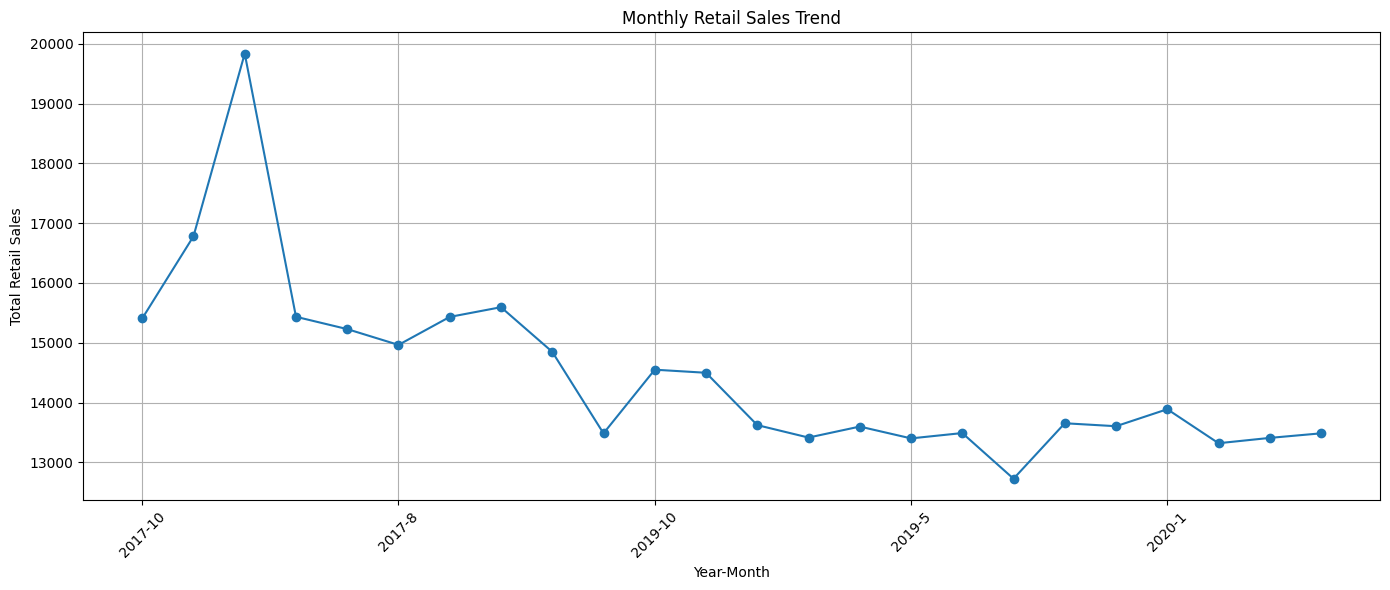

In [ ]:
df_clean['YEAR'] = df_clean['YEAR'].astype(str)
df_clean['MONTH'] = df_clean['MONTH'].astype(str)
df_clean['year_month'] = df_clean['YEAR'] + '-' + df_clean['MONTH']

monthly_sales = df_clean.groupby('year_month')['RETAIL SALES'].sum()

pltx.figure(figsize=(14, 6))
monthly_sales.plot(marker='o', linestyle='-')
pltx.title("Monthly Retail Sales Trend")
pltx.xlabel("Year-Month")
pltx.ylabel("Total Retail Sales")
pltx.xticks(rotation=45)
pltx.grid(True)
pltx.tight_layout()
pltx.show()


/tmp/ipython-input-2067748765.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  snsx.barplot(x=top_items.values, y=top_items.index, palette='viridis')


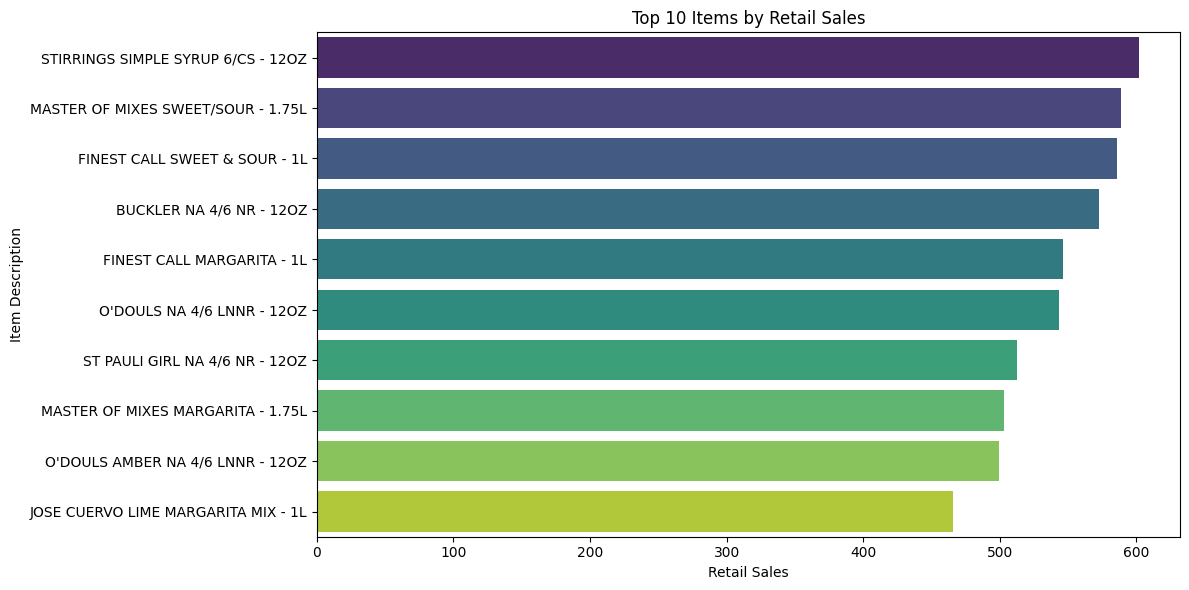

In [ ]:
top_items = df_clean.groupby('ITEM DESCRIPTION')['RETAIL SALES'].sum().sort_values(ascending=False).head(10)

pltx.figure(figsize=(12, 6))
snsx.barplot(x=top_items.values, y=top_items.index, palette='viridis')
pltx.title("Top 10 Items by Retail Sales")
pltx.xlabel("Retail Sales")
pltx.ylabel("Item Description")
pltx.tight_layout()
pltx.show()


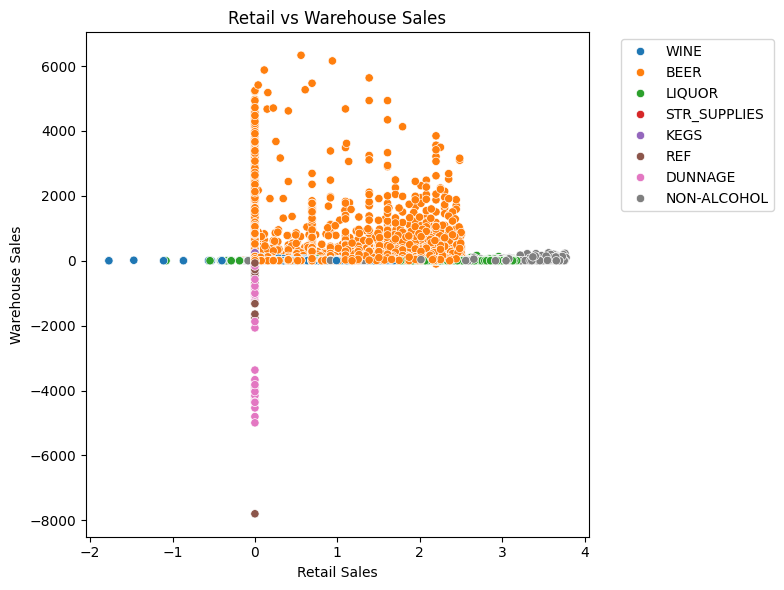

In [ ]:
pltx.figure(figsize=(8, 6))
snsx.scatterplot(data=df, x='RETAIL SALES', y='WAREHOUSE SALES', hue='ITEM TYPE')
pltx.title("Retail vs Warehouse Sales")
pltx.xlabel("Retail Sales")
pltx.ylabel("Warehouse Sales")
pltx.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pltx.tight_layout()
pltx.show()

In [ ]:
df = df.copy()
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['RETAIL SALES', 'ITEM TYPE'])


/tmp/ipython-input-2318261079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snsx.violinplot(data=df, x='ITEM TYPE', y='RETAIL SALES', palette='Set3', cut=0)


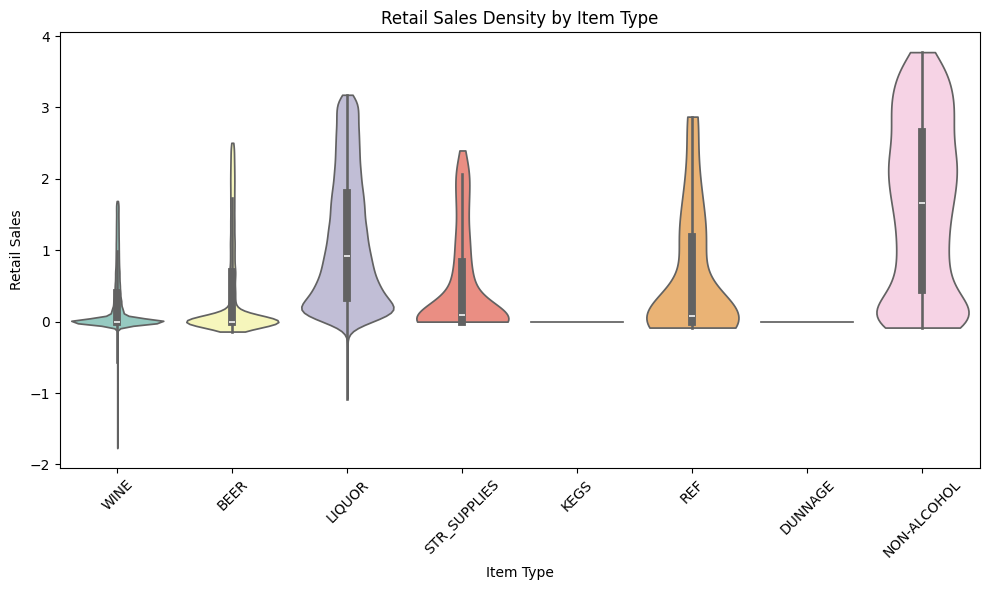

In [ ]:
pltx.figure(figsize=(10, 6))
snsx.violinplot(data=df, x='ITEM TYPE', y='RETAIL SALES', palette='Set3', cut=0)
pltx.title("Retail Sales Density by Item Type")
pltx.xlabel("Item Type")
pltx.ylabel("Retail Sales")
pltx.xticks(rotation=45)
pltx.tight_layout()
pltx.show()

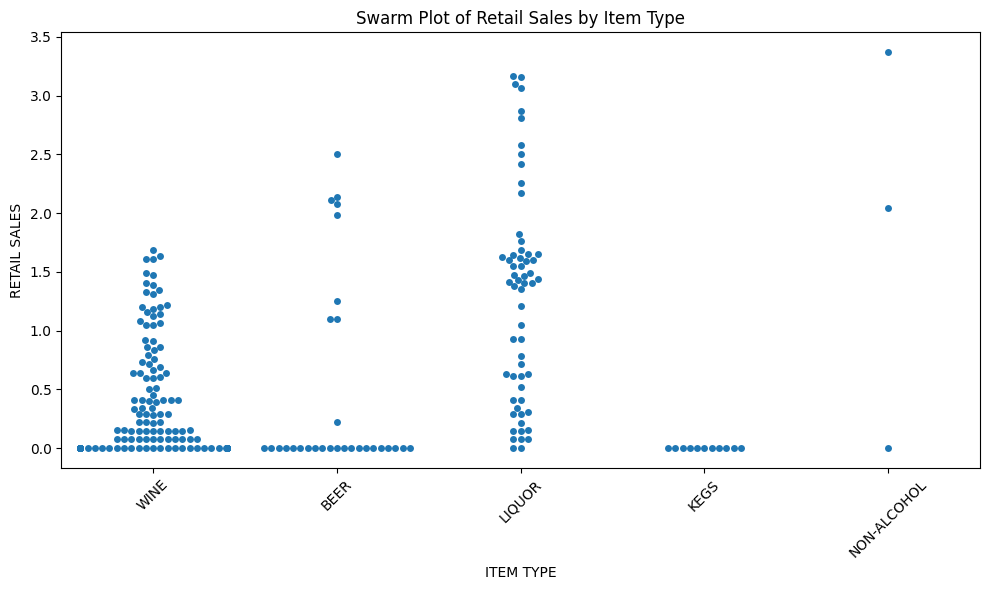

In [ ]:

warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')
pltx.figure(figsize=(10, 6))
snsx.swarmplot(data=df.sample(300), x='ITEM TYPE', y='RETAIL SALES' )
pltx.title("Swarm Plot of Retail Sales by Item Type")
pltx.xticks(rotation=45)
pltx.tight_layout()
pltx.show()

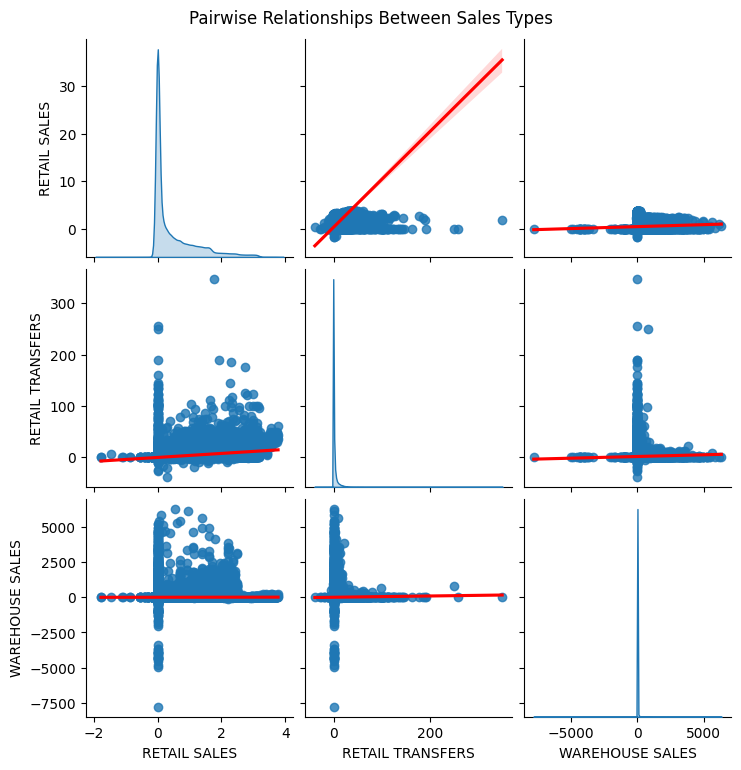

In [ ]:
snsx.pairplot(df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']], kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
pltx.suptitle("Pairwise Relationships Between Sales Types", y=1.02)
pltx.show()


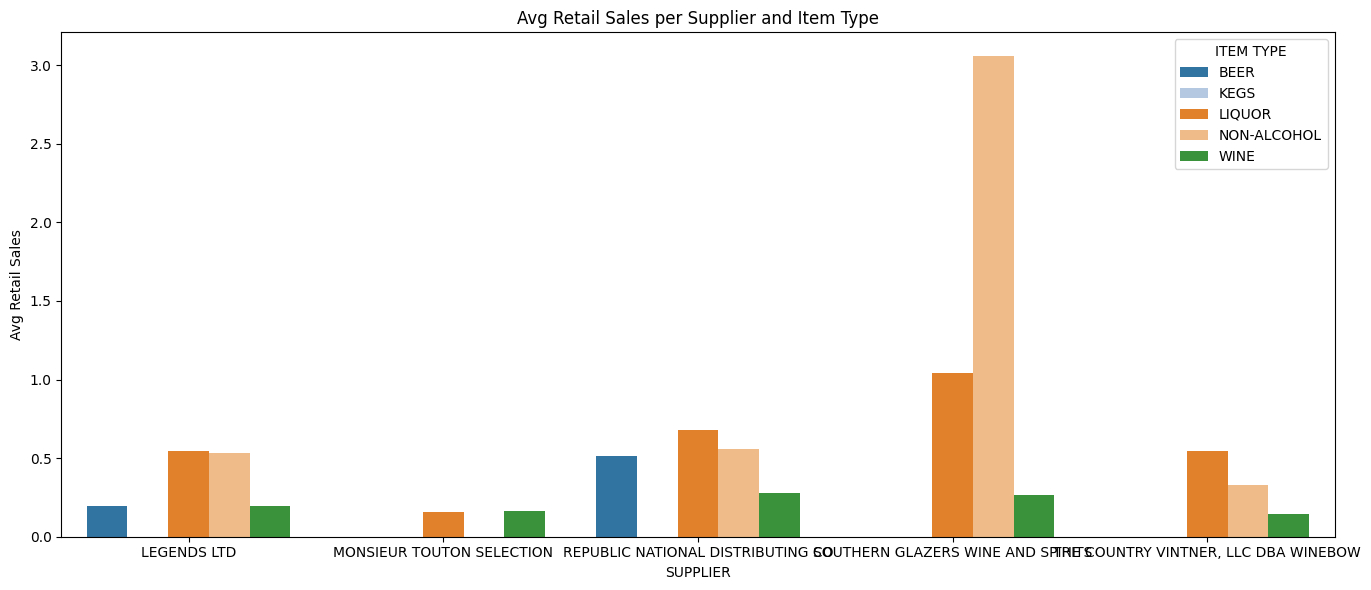

In [ ]:
top5_suppliers = df['SUPPLIER'].value_counts().nlargest(5).index
filtered_df = df[df['SUPPLIER'].isin(top5_suppliers)]

group_avg = filtered_df.groupby(['SUPPLIER', 'ITEM TYPE'])['RETAIL SALES'].mean().reset_index()

pltx.figure(figsize=(14, 6))
snsx.barplot(data=group_avg, x='SUPPLIER', y='RETAIL SALES', hue='ITEM TYPE', palette='tab20')
pltx.title("Avg Retail Sales per Supplier and Item Type")
pltx.ylabel("Avg Retail Sales")
pltx.tight_layout()
pltx.show()


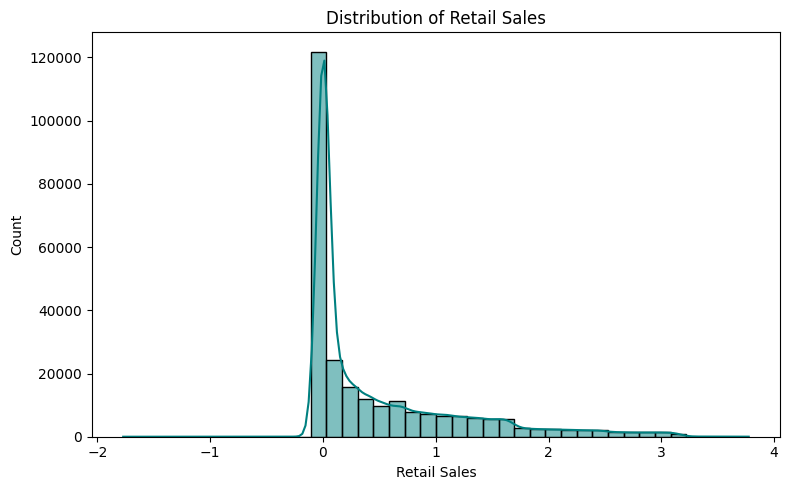

In [ ]:
pltx.figure(figsize=(8, 5))
snsx.histplot(df['RETAIL SALES'], bins=40, kde=True, color='teal')
pltx.title("Distribution of Retail Sales")
pltx.xlabel("Retail Sales")
pltx.ylabel("Count")
pltx.tight_layout()
pltx.show()


In [ ]:
categorical = [ 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE']
for col in categorical:
    encoder = LabelEncoder  ()
    df[col] = encoder.fit_transform(df[col])

### Segreating the Dataset into Dependent and Independent Columns

In [ ]:
X = df.drop(columns=['RETAIL SALES'])
y = pd.qcut(df['RETAIL SALES'], q=2, labels=[0, 1])  # Binary classification: low vs high


In [ ]:
y

,RETAIL SALES
0,0
1,0
2,0
3,0
4,1
...,...
307638,0
307639,1
307640,0
307642,1


### Spliting the  Dataset into X_train, X_test, y_train and y_test

In [ ]:
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Decision Tree

In [ ]:
decision_tree=TreeModel(random_state=0)
decision_tree.fit(X_train_scaled,y_train)


DecisionTreeClassifier(random_state=0)

In [ ]:
decision_pred= decision_tree.predict(X_test_scaled)

In [ ]:
dt_acc = acc_score(y_test, decision_pred)
dt_prec = prec_score(y_test, decision_pred)
dt_rec = rec_score(y_test, decision_pred)
dt_f1 = f1_val(y_test, decision_pred)

print("Decision Tree Metrics")
print("Accuracy:", dt_acc)
print("Precision:", dt_prec)
print("Recall:", dt_rec)
print("F1 Score:", dt_f1)

Decision Tree Metrics
Accuracy: 0.8814978396543447
Precision: 0.8781870796183325
Recall: 0.8802179281150786
F1 Score: 0.8792013311148087


In [ ]:
print("Classification Report:\n", classification_report(y_test, decision_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

           0     0.8847    0.8827    0.8837     26562
           1     0.8782    0.8802    0.8792     25513

    accuracy                         0.8815     52075
   macro avg     0.8814    0.8815    0.8815     52075
weighted avg     0.8815    0.8815    0.8815     52075



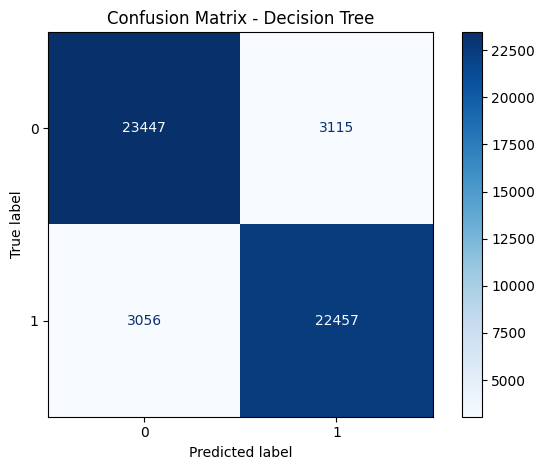

In [ ]:
cm = confusion_matrix(y_test, decision_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
pltx.title("Confusion Matrix - Decision Tree")
pltx.tight_layout()
pltx.show()

### RandomForest Classifier

In [ ]:
rd_model= ForestModel(n_estimators=100, random_state=0)
rd_model.fit(X_train_scaled,y_train)


RandomForestClassifier(random_state=0)

In [ ]:
rd_model_pred=rd_model.predict(X_test_scaled)

In [ ]:
rf_acc = acc_score(y_test, rd_model_pred)
rf_prec = prec_score(y_test, rd_model_pred)
rf_rec = rec_score(y_test, rd_model_pred)
rf_f1 = f1_val(y_test, rd_model_pred)


print("Random Forest Metrics")
print("Accuracy:", rf_acc)
print("Precision:", rf_prec)
print("Recall:", rf_rec)
print("F1 Score:", rf_f1)

Random Forest Metrics
Accuracy: 0.9039654344695152
Precision: 0.9002810085083132
Recall: 0.9041273076470819
F1 Score: 0.9022000586682312


In [ ]:
print("Classification Report:\n", classification_report(y_test, rd_model_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

           0     0.9075    0.9038    0.9057     26562
           1     0.9003    0.9041    0.9022     25513

    accuracy                         0.9040     52075
   macro avg     0.9039    0.9040    0.9039     52075
weighted avg     0.9040    0.9040    0.9040     52075



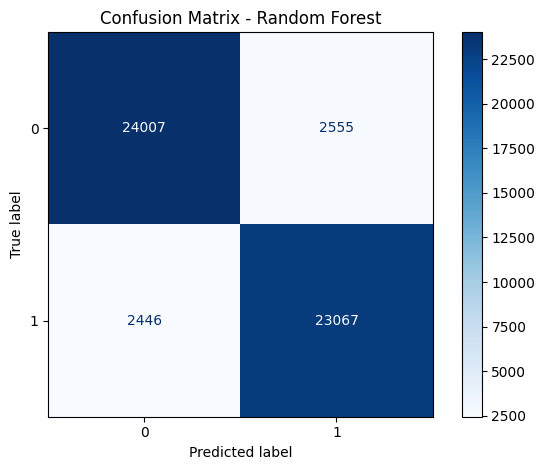

In [ ]:
cm = confusion_matrix(y_test, rd_model_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
pltx.title("Confusion Matrix - Random Forest")
pltx.tight_layout()
pltx.show()

### LogisticRegression

In [ ]:
lg_model=LogiReg(max_iter=1000)
lg_model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
lg_pred= lg_model.predict(X_test_scaled)

In [ ]:

lg_acc = acc_score(y_test, lg_pred)
lg_prec = prec_score(y_test, lg_pred)
lg_rec = rec_score(y_test, lg_pred)
lg_f1 = f1_val(y_test, lg_pred)

print("Logistic Regression Metrics")
print("Accuracy:", lg_acc)
print("Precision:", lg_prec)
print("Recall:", lg_rec)
print("F1 Score:", lg_f1)


Logistic Regression Metrics
Accuracy: 0.7676044167066731
Precision: 0.8723416069742906
Recall: 0.6157645122094618
F1 Score: 0.7219337346629291


In [ ]:
print("Classification Report:\n", classification_report(y_test, lg_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

           0     0.7122    0.9134    0.8004     26562
           1     0.8723    0.6158    0.7219     25513

    accuracy                         0.7676     52075
   macro avg     0.7923    0.7646    0.7612     52075
weighted avg     0.7907    0.7676    0.7620     52075



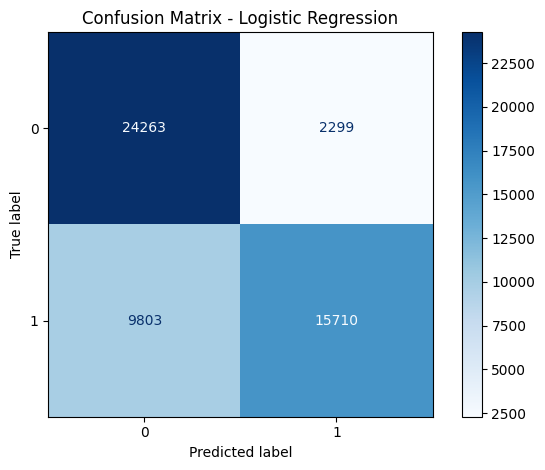

In [ ]:
cm = confusion_matrix(y_test, lg_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
pltx.title("Confusion Matrix - Logistic Regression")
pltx.tight_layout()
pltx.show()

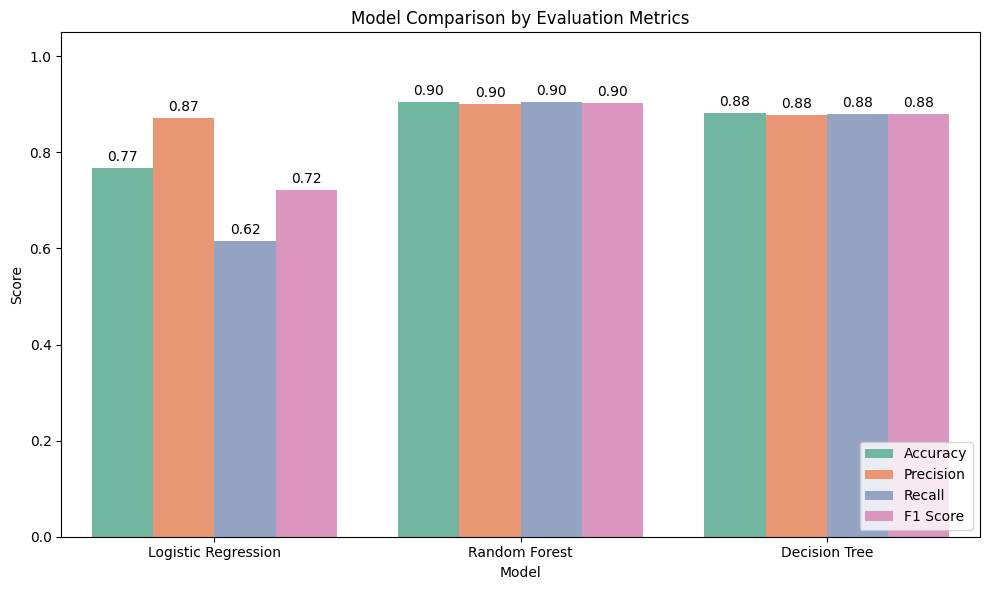

In [ ]:

model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracy = [lg_acc, rf_acc, dt_acc]
precision = [lg_prec, rf_prec, dt_prec]
recall = [lg_rec, rf_rec, dt_rec]
f1 = [lg_f1, rf_f1, dt_f1]

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')


pltx.figure(figsize=(10, 6))
bar_plot = snsx.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', palette='Set2')


for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.2f', padding=3)

pltx.title("Model Comparison by Evaluation Metrics")
pltx.ylim(0, 1.05)
pltx.ylabel("Score")
pltx.xlabel("Model")
pltx.legend(loc='lower right')
pltx.tight_layout()
pltx.show()


### Kmeans Clustering

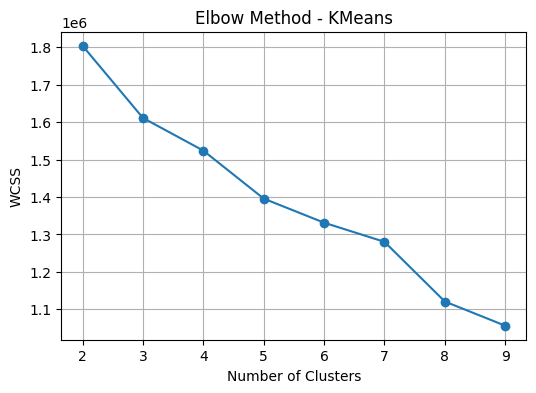

In [ ]:
X_scaled = scaler.fit_transform(X)

wcss = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

pltx.figure(figsize=(6, 4))
pltx.plot(K_range, wcss, marker='o')
pltx.title("Elbow Method - KMeans")
pltx.xlabel("Number of Clusters")
pltx.ylabel("WCSS")
pltx.grid(True)
pltx.show()



In [ ]:
X_sample = resample(X_scaled, n_samples=200000, random_state=42)

In [ ]:
pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X_sample)


kmeans = KMeans(n_clusters=4, random_state=42)
labels_pca = kmeans.fit_predict(X_pca)
print("Silhouette Score (KMeans + PCA):", silhouette_score(X_pca, labels_pca))

Silhouette Score (KMeans + PCA): 0.19291786148394785


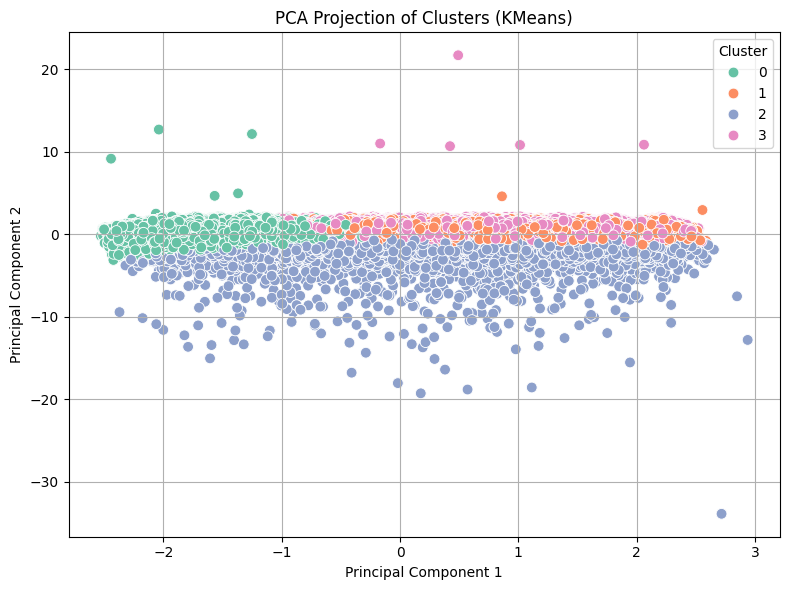

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': labels_pca
})


pltx.figure(figsize=(8, 6))
snsx.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
pltx.title("PCA Projection of Clusters (KMeans)")
pltx.xlabel("Principal Component 1")
pltx.ylabel("Principal Component 2")
pltx.legend(title='Cluster')
pltx.grid(True)
pltx.tight_layout()
pltx.show()

In [ ]:
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Avoid the warning by aligning determinism and n_jobs
reducer = umap.UMAP(init="pca", random_state=42, n_jobs=1)  # or init="random"
X_umap = reducer.fit_transform(X_sample)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_umap)

print("Silhouette Score (KMeans + UMAP):", silhouette_score(X_umap, labels))


Silhouette Score (KMeans + UMAP): 0.40504992


- UMAP is used to reduce high-dimensional feature space into 2D for better visualization and clustering
- UMAP preserves both global and local structure better than PCA or t-SNE in many cases


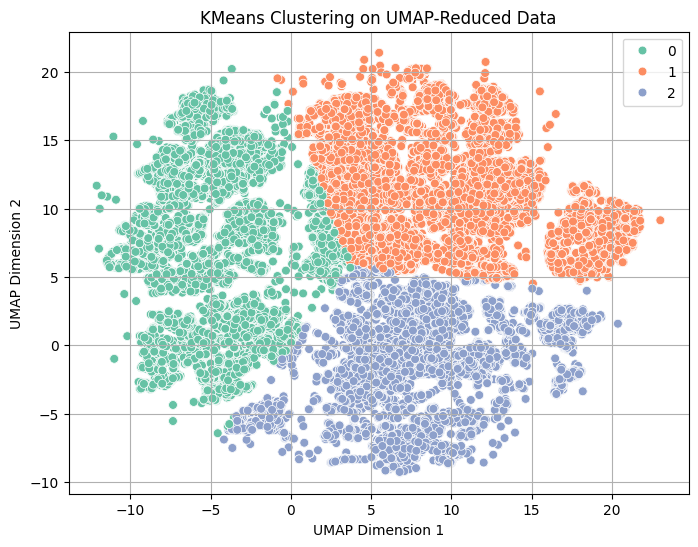

In [ ]:

pltx.figure(figsize=(8, 6))
snsx.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels, palette='Set2', s=40)
pltx.title("KMeans Clustering on UMAP-Reduced Data")
pltx.xlabel("UMAP Dimension 1")
pltx.ylabel("UMAP Dimension 2")
pltx.grid(True)
pltx.show()

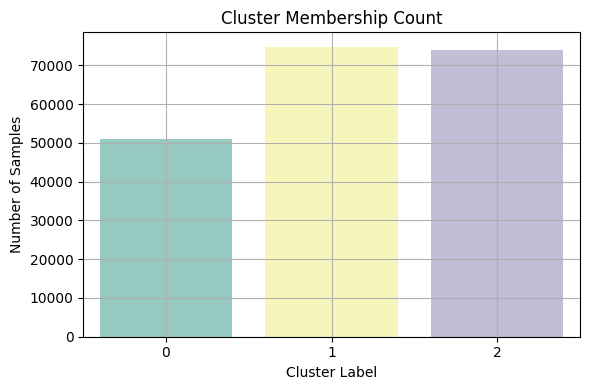

In [ ]:
pltx.figure(figsize=(6, 4))
snsx.countplot(x=labels, palette='Set3')
pltx.title("Cluster Membership Count")
pltx.xlabel("Cluster Label")
pltx.ylabel("Number of Samples")
pltx.grid(True)
pltx.tight_layout()
pltx.show()


### DBSCAN Clustering

In [ ]:

dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_sample)

noise_ratio = (db_labels == -1).sum() / len(db_labels)
print("Noise Ratio (DBSCAN):", noise_ratio)

mask = db_labels != -1
if len(set(db_labels[mask])) > 1:
    print("Silhouette Score (DBSCAN):", silhouette_score(X_sample[mask], db_labels[mask]))
else:
    print("Silhouette Score (DBSCAN): Not enough clusters")


Noise Ratio (DBSCAN): 0.002515
Silhouette Score (DBSCAN): 0.1604766227989567


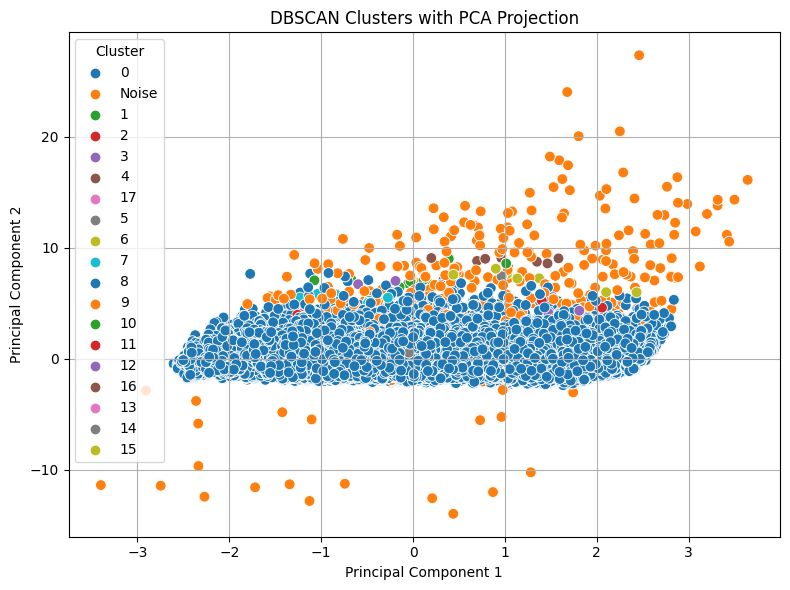

In [ ]:
dbscan_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': db_labels
})


dbscan_df['Cluster'] = dbscan_df['Cluster'].astype(str)
dbscan_df.loc[dbscan_df['Cluster'] == '-1', 'Cluster'] = 'Noise'

pltx.figure(figsize=(8, 6))
snsx.scatterplot(data=dbscan_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
pltx.title("DBSCAN Clusters with PCA Projection")
pltx.xlabel("Principal Component 1")
pltx.ylabel("Principal Component 2")
pltx.legend(title='Cluster')
pltx.grid(True)
pltx.tight_layout()
pltx.show()